In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('problem_1/train.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [3]:
data.Dataset.unique()

array([1, 2])

In [4]:
data['Dataset'].value_counts()

1    333
2    133
Name: Dataset, dtype: int64

In [5]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
data.groupby('Dataset')['Total_Bilirubin'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,333.0,4.298198,7.495798,0.4,0.8,1.3,3.8,75.0
2,133.0,1.173684,0.982953,0.5,0.7,0.9,1.2,7.3


In [7]:
data.groupby('Dataset')['Direct_Bilirubin'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,333.0,1.937237,3.224996,0.1,0.2,0.5,1.9,19.7
2,133.0,0.415789,0.511806,0.1,0.2,0.2,0.4,3.6


In [8]:
data.groupby('Dataset')['Alkaline_Phosphotase'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,333.0,324.741742,279.079532,63.0,185.0,230.0,331.0,2110.0
2,133.0,220.105263,145.631918,100.0,162.0,188.0,215.0,1580.0


In [9]:
data.groupby('Dataset')['Alamine_Aminotransferase'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,333.0,101.735736,224.718906,12.0,25.0,41.0,76.0,2000.0
2,133.0,34.804511,26.678915,10.0,20.0,28.0,40.0,181.0


In [10]:
data.groupby('Dataset')['Aspartate_Aminotransferase'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,333.0,144.219219,365.420170,11.0,29.0,52.0,114.0,4929.0
2,133.0,41.781955,37.699035,10.0,22.0,29.0,45.0,285.0


In [11]:
data.groupby('Dataset')['Total_Protiens'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,333.0,6.457958,1.111321,2.7,5.7,6.5,7.2,9.6
2,133.0,6.576692,1.057648,3.7,5.9,6.7,7.3,8.5


In [12]:
data.groupby('Dataset')['Albumin'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,333.0,3.056757,0.799053,0.9,2.5,3.0,3.6,5.5
2,133.0,3.381203,0.776370,1.4,2.9,3.5,4.0,5.0


In [13]:
data.groupby('Dataset')['Albumin_and_Globulin_Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,331.0,0.917885,0.342427,0.30,0.7,0.9,1.1,2.8
2,132.0,1.044924,0.292555,0.37,0.9,1.0,1.2,1.9


In [14]:
data.loc[ data['Albumin_and_Globulin_Ratio'].isnull() == True ]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
31,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
41,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2
188,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1


In [15]:
data.dropna(inplace=True)

In [16]:
#Adding new features
def get_gender_code( x ):
    return 0 if x == 'Male' else 1

def get_age_cat( x ):
    if x < 20:
        return 0
    elif x < 40:
        return 1
    elif x < 60:
        return 2
    else:
        return 3
    
def get_high_tot_bil( x ):
    if x >= 2.2:
        return 1
    else:
        return 0

def get_high_dir_bil( x ):
    if x >= 1.2:
        return 1
    else:
        return 0
    
def get_low_alb( x ):
    if x < 1.5:
        return 1
    else:
        return 0

data['Gender_code'] = data['Gender'].apply(get_gender_code)
data['Age_Category'] = data['Age'].apply(get_age_cat)
data['Globulin'] = data['Albumin']/data['Albumin_and_Globulin_Ratio']
data['high_tot_bil'] = data['Total_Bilirubin'].apply(get_high_tot_bil)
data['high_dir_bil'] = data['Direct_Bilirubin'].apply(get_high_dir_bil)
data['low_alb'] = data['Albumin'].apply(get_low_alb)

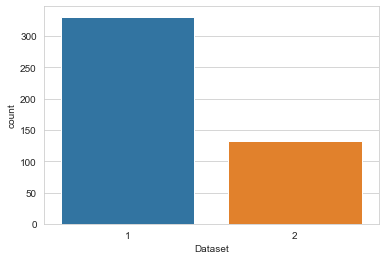

In [17]:
# Counts of categories 1 and 2 in Dataset column
sns.countplot(label='count',x='Dataset',data=data);

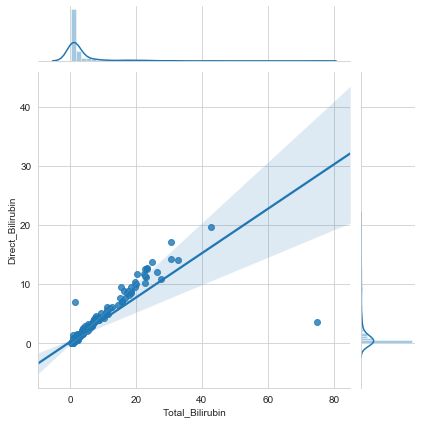

In [18]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=data, kind="reg")

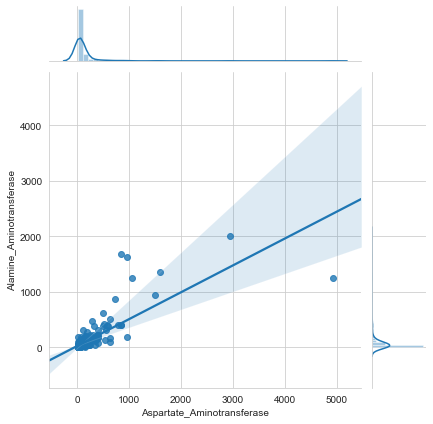

In [19]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=data, kind="reg")

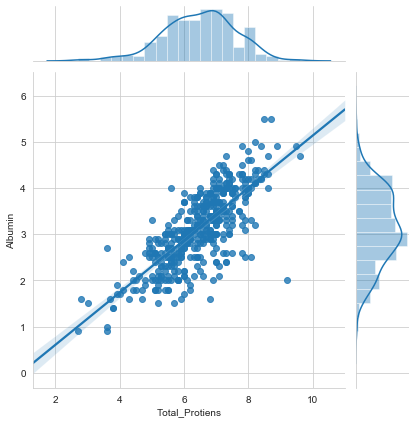

In [20]:
sns.jointplot("Total_Protiens", "Albumin", data=data, kind="reg")

In [21]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_code,Age_Category,Globulin,high_tot_bil,high_dir_bil,low_alb
Age,1.000000,0.016519,0.003891,0.110840,-0.067595,0.005517,-0.199145,-0.278243,-0.221264,-0.132859,-0.030772,0.942352,0.063847,0.110410,0.093006,0.066857
Total_Bilirubin,0.016519,1.000000,0.865944,0.152563,0.201516,0.227341,0.007998,-0.210753,-0.188128,-0.217805,-0.107918,0.028715,0.221805,0.585949,0.603915,-0.010927
Direct_Bilirubin,0.003891,0.865944,1.000000,0.185906,0.235222,0.260217,0.025153,-0.212337,-0.173758,-0.244710,-0.117985,0.026630,0.225904,0.647159,0.681701,-0.012205
Alkaline_Phosphotase,0.110840,0.152563,0.185906,1.000000,0.099927,0.150559,-0.020949,-0.162802,-0.239228,-0.186383,0.045341,0.096916,0.184270,0.193339,0.203415,-0.037845
Alamine_Aminotransferase,-0.067595,0.201516,0.235222,0.099927,1.000000,0.784172,-0.032339,-0.009111,0.015321,-0.157366,-0.090355,-0.049829,-0.024274,0.271204,0.285248,0.023794
Aspartate_Aminotransferase,0.005517,0.227341,0.260217,0.150559,0.784172,1.000000,-0.015526,-0.074725,-0.059750,-0.148565,-0.086189,0.020545,0.064361,0.294123,0.308872,0.015118
Total_Protiens,-0.199145,0.007998,0.025153,-0.020949,-0.032339,-0.015526,1.000000,0.772154,0.215055,0.043182,0.142876,-0.196993,0.554135,-0.054779,-0.034692,-0.285088
Albumin,-0.278243,-0.210753,-0.212337,-0.162802,-0.009111,-0.074725,0.772154,1.000000,0.673159,0.177963,0.139252,-0.279763,-0.002589,-0.283253,-0.261468,-0.263529
Albumin_and_Globulin_Ratio,-0.221264,-0.188128,-0.173758,-0.239228,0.015321,-0.059750,0.215055,0.673159,1.000000,0.172084,0.015578,-0.217674,-0.645844,-0.263793,-0.248488,-0.162425
Dataset,-0.132859,-0.217805,-0.244710,-0.186383,-0.157366,-0.148565,0.043182,0.177963,0.172084,1.000000,0.049865,-0.106525,-0.123427,-0.286977,-0.308600,-0.019695


In [22]:
data.groupby('Dataset')['Globulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,331.0,3.531081,0.825216,1.000000,3.000000,3.500000,4.000000,6.666667
2,132.0,3.318929,0.616754,1.736842,2.927561,3.302542,3.783333,5.333333


In [23]:
data.groupby('Dataset')['high_tot_bil'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,331.0,0.371601,0.483964,0.0,0.0,0.0,1.0,1.0
2,132.0,0.083333,0.277438,0.0,0.0,0.0,0.0,1.0


In [24]:
data.groupby('Dataset')['high_dir_bil'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,331.0,0.356495,0.479689,0.0,0.0,0.0,1.0,1.0
2,132.0,0.053030,0.224948,0.0,0.0,0.0,0.0,1.0


In [25]:
# Processing required columns
features = ['Age','Direct_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Total_Protiens'
            ,'Albumin','Gender_code','Age_Category','Globulin','high_dir_bil','high_tot_bil','low_alb']

X = data[features]
y = data['Dataset']

In [26]:
# Splitting given training data further into train and test, in order to make accurate predictions ( 80% - 20% )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [27]:
# Model 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.7956989247311828


In [28]:
# Model 2
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                            penalty='l2',random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.7419354838709677


In [29]:
# Model 3
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()

grad.fit(X_train,y_train)
y_pred = grad.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.7526881720430108


In [30]:
# Model 4
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(n_estimators=100)

rand_for.fit(X_train,y_train)
y_pred = rand_for.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.7311827956989247


In [31]:
# Model 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.6881720430107527


In [32]:
# Comparing all the accuracies, Linear Discriminant Analysis is chosen as best fit model.

In [33]:
test = pd.read_csv('problem_1/test.csv')


test['Gender_code'] = test['Gender'].apply(get_gender_code)
test['Age_Category'] = test['Age'].apply(get_age_cat)
test['Globulin'] = test['Albumin']/test['Albumin_and_Globulin_Ratio']
test['high_tot_bil'] = test['Total_Bilirubin'].apply(get_high_tot_bil)
test['high_dir_bil'] = test['Direct_Bilirubin'].apply(get_high_dir_bil)
test['low_alb'] = test['Albumin'].apply(get_low_alb)

In [34]:
test.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
Gender_code                   0
Age_Category                  0
Globulin                      1
high_tot_bil                  0
high_dir_bil                  0
low_alb                       0
dtype: int64

In [35]:
test.fillna(test.mean(),inplace=True)

In [36]:
X_test = test[features]
test['Dataset'] = lda.predict(X_test)

data = pd.read_csv('problem_1/test.csv')
data = pd.concat([data,test['Dataset']],axis=1)
data.to_csv('problem_1/predicted.csv',encoding='utf-8',index=False)